In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import intake,yaml
import intake_esm
from scipy import special
import keras
from keras.models import Model
from keras.layers import Dense, Input

In [2]:
def latest_version(cat):
    """
    input
    cat: esmdatastore
    output
    esmdatastore with latest DRS versions
    """
    latest_cat = cat.df.sort_values(by=['version','path']).drop_duplicates(['temporal_subset','source_id','table_id',
                                               'institution_id','variable_id','member_id',
                                               'grid_label','experiment_id'],keep='last')
    return latest_cat

In [3]:
#col_url = "https://cmip6-nc.s3.us-east-2.amazonaws.com/esgf-world.json" 
col_url = "https://raw.githubusercontent.com/aradhakrishnanGFDL/gfdl-aws-analysis/master/esm-collection-spec-examples/esgf-world.json"
col = intake.open_esm_datastore(col_url)
esmcol_data = col.esmcol_data

In [4]:
model_name = 'IPSL-CM6A-LR'

In [5]:
#mlotst, tos,uo,vo

In [7]:
def chunk_time(ds):
    if 'time' in ds.dims:
        ds = ds.chunk({'time':1})
    return ds

In [8]:
# Necessary for creating a common time axis for all models
# We want to create a common time axis so there will be no gaps when plotting the results 

def fix_time(ds):
    """ force calendar to noleap"""
    import xarray as xr
    
    if "time" not in ds.dims:
        return ds
    
    if ("calendar" not in ds["time"].attrs): 
        ds["time"].attrs.update({"calendar": "noleap"})
        
    if ds["time"].attrs["calendar"] not in ["noleap", "NOLEAP", "365_day"]:
        ds["time"].attrs.update({"calendar": "noleap"})
        
    ds = xr.decode_cf(ds)
    return ds

In [79]:
def pp_enso(ds):
    ds = ds.copy()   #the wrapper function makes a copy of the ds and works from this
    #ds = rename_cmip6(ds)
    ds = fix_time(ds)
    #ds = fix_units(ds)
    #ds = correct_units(ds)
    return ds

In [7]:
#tos_ sea surface temperature
#area cello
#ofx ocean fixed
#omon  ocean monthly average 

In [19]:

query_Omon_tos = dict(experiment_id=['abrupt-4xCO2','1pctCO2','historical'],
                 table_id=['Omon'],
                 member_id=["r1i1p1f1","r1i1p1f2"],
                 source_id=model_name,
                 grid_label=['gn'],
                 variable_id=["tos"])
query_Ofx = dict(experiment_id=['abrupt-4xCO2','1pctCO2','historical'],
                 table_id=['Ofx'],
               member_id=["r1i1p1f1","r1i1p1f2"],
                 source_id=model_name,
                 grid_label=['gn'],
                 variable_id=["areacello"])

In [20]:
cat_Omon_tos = col.search(**query_Omon_tos)
cat_Omon_tos_lat = latest_version(cat_Omon_tos)

cat_Omon_tos_latest = intake.open_esm_datastore(cat_Omon_tos_lat,esmcol_data=esmcol_data)

In [21]:
cat_Omon_tos_latest.df

,project,institution_id,source_id,experiment_id,frequency,modeling_realm,table_id,member_id,grid_label,variable_id,temporal_subset,version,path
0,CMIP6,IPSL,IPSL-CM6A-LR,1pctCO2,mon,ocean,Omon,r1i1p1f1,gn,tos,185001-199912,v20180727,s3://esgf-world/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/1...
7,CMIP6,IPSL,IPSL-CM6A-LR,historical,mon,ocean,Omon,r1i1p1f1,gn,tos,185001-201412,v20180803,s3://esgf-world/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/h...
4,CMIP6,IPSL,IPSL-CM6A-LR,abrupt-4xCO2,mon,ocean,Omon,r1i1p1f1,gn,tos,185001-214912,v20190118,s3://esgf-world/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/a...
5,CMIP6,IPSL,IPSL-CM6A-LR,abrupt-4xCO2,mon,ocean,Omon,r1i1p1f1,gn,tos,215001-244912,v20190118,s3://esgf-world/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/a...
6,CMIP6,IPSL,IPSL-CM6A-LR,abrupt-4xCO2,mon,ocean,Omon,r1i1p1f1,gn,tos,245001-274912,v20190118,s3://esgf-world/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/a...


In [22]:
cat_Ofx = col.search(**query_Ofx)
cat_Ofx_lat = latest_version(cat_Ofx)

cat_Ofx_latest = intake.open_esm_datastore(cat_Ofx_lat,esmcol_data=esmcol_data)

In [23]:
cat_Ofx_latest.df

,project,institution_id,source_id,experiment_id,frequency,modeling_realm,table_id,member_id,grid_label,variable_id,temporal_subset,version,path
0,CMIP6,IPSL,IPSL-CM6A-LR,1pctCO2,NaN,NaN,Ofx,r1i1p1f1,gn,areacello,NaN,v20180727,s3://esgf-world/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/1...
4,CMIP6,IPSL,IPSL-CM6A-LR,historical,NaN,NaN,Ofx,r1i1p1f1,gn,areacello,NaN,v20180803,s3://esgf-world/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/h...
3,CMIP6,IPSL,IPSL-CM6A-LR,abrupt-4xCO2,NaN,NaN,Ofx,r1i1p1f1,gn,areacello,NaN,v20190118,s3://esgf-world/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/a...


In [80]:
dict_Omon_tos = cat_Omon_tos_latest.to_dataset_dict(storage_options=dict(anon=True), cdf_kwargs={'decode_times': False,'chunks': {'time': 1}}, preprocess = pp_enso)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'project.institution_id.source_id.experiment_id.table_id'


In [27]:
dict_Ofx = cat_Ofx_latest.to_dataset_dict(storage_options=dict(anon=True),cdf_kwargs={'decode_times': True,'chunks': {}})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'project.institution_id.source_id.experiment_id.table_id'


In [28]:
dict_Omon_tos.keys()

dict_keys(['CMIP6.IPSL.IPSL-CM6A-LR.historical.Omon', 'CMIP6.IPSL.IPSL-CM6A-LR.1pctCO2.Omon', 'CMIP6.IPSL.IPSL-CM6A-LR.abrupt-4xCO2.Omon'])

In [29]:
dict_Ofx.keys()

dict_keys(['CMIP6.IPSL.IPSL-CM6A-LR.1pctCO2.Ofx', 'CMIP6.IPSL.IPSL-CM6A-LR.historical.Ofx', 'CMIP6.IPSL.IPSL-CM6A-LR.abrupt-4xCO2.Ofx'])

In [30]:
ds_Ofx = dict_Ofx["CMIP6.IPSL.IPSL-CM6A-LR.historical.Ofx"] #xarray dataset object to access Ofx areacello dataset used to calculate the weighted average

In [31]:
def distance_on_unit_sphere(lat1, long1, lat2, long2):

    # Convert latitude and longitude to
    # spherical coordinates in radians.
    degrees_to_radians = np.pi / 180.0

    # phi = 90 - latitude
    phi1 = (90.0 - lat1) * degrees_to_radians
    phi2 = (90.0 - lat2) * degrees_to_radians

    # theta = longitude
    theta1 = long1 * degrees_to_radians
    theta2 = long2 * degrees_to_radians
    # Compute spherical distance from spherical coordinates.
    # For two locations in spherical coordinates
    # (1, theta, phi) and (1, theta, phi)
    # cosine( arc length ) =
    #    sin phi sin phi' cos(theta-theta') + cos phi cos phi'
    # distance = rho * arc length
    cos = np.sin(phi1) * np.sin(phi2) * np.cos(theta1 - theta2) + np.cos(phi1) * np.cos(
        phi2
    )
    arc = np.arccos(cos)
    # Remember to multiply arc by the radius of the earth
    # in your favorite set of units to get length.
    return arc

In [32]:
def find_closest_grid_point(lon, lat, gridlon, gridlat):
    """find integer indices of closest grid point in grid of coordinates
    gridlon, gridlat for a given geographical lon/lat.
    PARAMETERS:
    -----------
        lon (float): longitude of point to find
        lat (float): latitude of point to find
        gridlon (numpy.ndarray): grid longitudes
        gridlat (numpy.ndarray): grid latitudes
    RETURNS:
    --------
    iclose, jclose: integer
        grid indices for geographical point of interest
    """

    if isinstance(gridlon, xr.core.dataarray.DataArray):
        gridlon = gridlon.values
    if isinstance(gridlat, xr.core.dataarray.DataArray):
        gridlat = gridlat.values
    dist = distance_on_unit_sphere(lat, lon, gridlat, gridlon)
    jclose, iclose = np.unravel_index(dist.argmin(), gridlon.shape)
    return iclose, jclose


In [119]:
i,j= find_closest_grid_point(-157, -5, ds_hist.nav_lon, ds_hist.nav_lat)#for southwest
i,j

(130, 171)

In [120]:
k,l = find_closest_grid_point(-90, 5, ds_hist.nav_lon, ds_hist.nav_lat)#for northwest
k,l

(197, 201)

CALCULATING the summation of areacello

In [90]:
#TODO INSERT CELL SELECT region of interest in areacello
areacello_nino3 = ds_Ofx.areacello.sel(y = slice(j,l), x = slice(i,k))

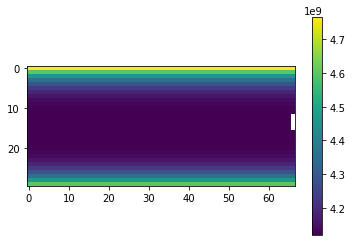

In [91]:
plt.imshow(areacello_nino3[0])
plt.colorbar()

In [92]:
#TODO 
#CALCULATE total_areacello, summation across lat,lon (in our dataset y,x respectively)

total_areacello = areacello_nino3.sum(dim=('x', 'y'))


NINO3 INDEX CALCULATION 

REGION 

(5S-5N , 150W-90W) 

SELECT tos and areacello for the region of interest

## Historical

In [121]:
ds_hist = dict_Omon_tos["CMIP6.IPSL.IPSL-CM6A-LR.historical.Omon"]


In [136]:
ds_hist.time.to_dataframe()

,time
time,
1850-01-16 12:00:00,1850-01-16 12:00:00
1850-02-15 00:00:00,1850-02-15 00:00:00
1850-03-16 12:00:00,1850-03-16 12:00:00
1850-04-16 00:00:00,1850-04-16 00:00:00
1850-05-16 12:00:00,1850-05-16 12:00:00
...,...
2014-09-25 12:00:00,2014-09-25 12:00:00
2014-10-26 00:00:00,2014-10-26 00:00:00
2014-11-25 12:00:00,2014-11-25 12:00:00


In [123]:
tos_his = ds_hist.tos.sel(time = slice("1980", "2011"))

In [124]:
tos_his.coords

Coordinates:
    nav_lat    (y, x) float32 dask.array<chunksize=(332, 362), meta=np.ndarray>
    nav_lon    (y, x) float32 dask.array<chunksize=(332, 362), meta=np.ndarray>
  * time       (time) object 1980-01-16 12:00:00 ... 2011-12-25 00:00:00
  * member_id  (member_id) <U8 'r1i1p1f1'

In [127]:
tos_his = ds_hist.tos.sel(y = slice(j,l), x = slice(i,k), time = slice("1980", "2011"))
tos_his

<xarray.DataArray 'tos' (member_id: 1, time: 384, y: 30, x: 67)>
dask.array<getitem, shape=(1, 384, 30, 67), dtype=float32, chunksize=(1, 1, 30, 67), chunktype=numpy.ndarray>
Coordinates:
    nav_lat    (y, x) float32 dask.array<chunksize=(30, 67), meta=np.ndarray>
    nav_lon    (y, x) float32 dask.array<chunksize=(30, 67), meta=np.ndarray>
  * time       (time) object 1980-01-16 12:00:00 ... 2011-12-25 00:00:00
  * member_id  (member_id) <U8 'r1i1p1f1'
Dimensions without coordinates: y, x
Attributes:
    standard_name:       sea_surface_temperature
    long_name:           Sea Surface Temperature
    units:               degC
    online_operation:    average
    cell_methods:        area: mean where sea time: mean
    interval_operation:  2700 s
    interval_write:      1 month
    cell_measures:       area: areacello
    description:         This may differ from "surface temperature" in region...
    history:             none

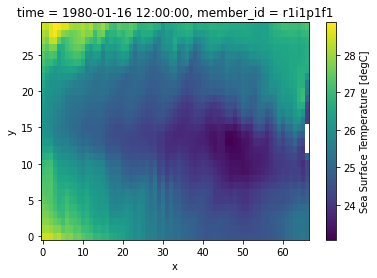

In [128]:
tos_his.isel(time=0).plot()


CALCULATE SEA SURFACE TEMPERATURE WEIGHTED AVERAGE

In [129]:
tos_mean_nino3_his = (tos_his * areacello_nino3).sum(dim=('x', 'y')) / total_areacello
#nino3_index.plot()

In [130]:
tos_mean_nino3_his.compute()

<xarray.DataArray (member_id: 1, time: 384)>
array([[25.320503, 25.591429, 26.330265, 27.146347, 27.808964, 27.26193 ,
        26.11298 , 25.363113, 24.821878, 24.67658 , 25.567368, 26.013117,
        26.348705, 26.402037, 26.611761, 27.033844, 27.256855, 26.060717,
        25.320845, 24.636692, 23.824469, 23.89342 , 24.220676, 23.742228,
        23.17499 , 23.473248, 24.106218, 24.340286, 24.364473, 23.4397  ,
        22.487907, 21.842194, 21.465448, 21.55533 , 22.030708, 22.091986,
        22.251953, 22.92375 , 24.58969 , 25.66656 , 26.182842, 26.035646,
        25.212778, 24.863142, 24.660597, 24.432215, 24.467722, 24.325356,
        24.384422, 24.36836 , 24.9411  , 25.234837, 25.65802 , 24.773615,
        23.85855 , 23.092182, 22.504187, 22.460356, 22.452768, 22.242538,
        22.145914, 22.688513, 23.415676, 23.33062 , 22.875526, 23.093357,
        22.659172, 22.54539 , 22.332981, 22.23311 , 22.68993 , 22.694193,
        22.64916 , 23.16314 , 24.55515 , 25.977682, 27.463434, 27.043941,
        25.940683, 25.34625 , 25.233006, 25.186747, 25.55155 , 25.734911,
        25.69544 , 26.09789 , 26.635   , 28.085388, 28.025915, 27.033058,
        25.8216  , 24.85779 , 24.248579, 24.290094, 24.180511, 24.514822,
        24.758644, 25.140575, 26.32711 , 26.777065, 28.082634, 27.90866 ,
        27.30343 , 26.743923, 26.371094, 27.03275 , 27.573553, 28.232912,
        28.595697, 28.89747 , 29.135138, 29.194622, 28.814405, 27.503925,
        25.879097, 24.656036, 23.831755, 23.834703, 24.298069, 24.289183,
...
        26.21621 , 25.278778, 24.771807, 24.935776, 25.030258, 24.864443,
        25.116608, 25.481443, 25.805094, 26.33669 , 26.692839, 25.867428,
        24.244892, 23.443066, 23.099655, 22.95247 , 22.815142, 22.610044,
        22.940338, 23.338305, 24.310085, 25.404938, 26.025362, 25.783936,
        24.948547, 24.5203  , 24.455103, 24.324055, 24.77655 , 24.924757,
        25.158268, 25.907076, 26.845184, 28.234646, 29.159143, 28.643963,
        27.455254, 26.501028, 26.057852, 26.219133, 26.37725 , 26.686329,
        27.086628, 27.521593, 27.923632, 28.40308 , 27.985785, 26.49382 ,
        25.094536, 24.223595, 23.721973, 23.718027, 23.54103 , 23.598911,
        23.472755, 23.674107, 24.676329, 24.798203, 25.974245, 25.153484,
        23.757208, 23.01681 , 22.579046, 22.58941 , 22.790548, 22.754126,
        22.955288, 23.682636, 24.654617, 25.695475, 27.352745, 26.570364,
        25.94723 , 24.960575, 24.507227, 24.533615, 24.749256, 25.042133,
        25.33496 , 26.18181 , 26.995579, 27.941484, 29.150335, 28.777613,
        27.887154, 26.974892, 26.538946, 26.930933, 27.491001, 28.01631 ,
        28.384947, 28.759577, 28.834055, 29.237444, 29.25018 , 26.56527 ,
        24.37281 , 23.588303, 23.326532, 23.11367 , 23.364779, 23.147795,
        23.22598 , 22.86051 , 23.691051, 24.831553, 25.86373 , 24.808607,
        24.37695 , 24.136822, 23.769896, 23.869366, 24.355133, 24.729788]],
      dtype=float32)
Coordinates:
  * time       (time) object 1980-01-16 12:00:00 ... 2011-12-25 00:00:00
  * member_id  (member_id) <U8 'r1i1p1f1'

In [131]:
tos_mean_nino3_his.size #1980 values, 1 value per month , 12 per year for 165 years

384

In [132]:
tos_mean_nino3_his.isel(time=0).compute()

<xarray.DataArray (member_id: 1)>
array([25.320503], dtype=float32)
Coordinates:
    time       object 1980-01-16 12:00:00
  * member_id  (member_id) <U8 'r1i1p1f1'

In [133]:
datetimeindex = tos_mean_nino3_his.indexes['time'].to_datetimeindex()
tos_mean_nino3_his['time'] = datetimeindex


<ipython-input-133-e7b25880c2d7>:1: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = tos_mean_nino3_his.indexes['time'].to_datetimeindex()


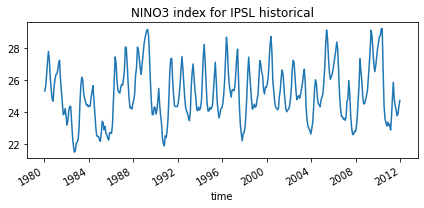

In [134]:
tos_mean_nino3_his.sel(time=slice("1980", "2011")).plot(aspect=2, size=3)
plt.title("NINO3 index for IPSL historical")
plt.tight_layout()
plt.draw()

In [135]:
tos_his.time.to_dataframe()

,time
time,
1980-01-16 12:00:00,1980-01-16 12:00:00
1980-02-16 12:00:00,1980-02-16 12:00:00
1980-03-18 12:00:00,1980-03-18 12:00:00
1980-04-17 12:00:00,1980-04-17 12:00:00
1980-05-18 00:00:00,1980-05-18 00:00:00
...,...
2011-08-24 12:00:00,2011-08-24 12:00:00
2011-09-24 12:00:00,2011-09-24 12:00:00
2011-10-25 00:00:00,2011-10-25 00:00:00


ADDITIONAL EXPLORATION

CLIMATOLOGY (average all Jans, Febs, etc) CALC EXAMPLES (YEARS NEED A TWEAK, calculate for 20 year chunks or as needed)

In [137]:
tos_nino3_climatology = tos_his.sel(time=slice("1980", "2011")).groupby('time.day').mean(dim='time')


In [138]:
tos_nino3_climatology.compute()

/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'tos' (member_id: 1, day: 11, y: 30, x: 67)>
array([[[[28.294605, 28.173744, 28.156624, ..., 25.767977, 25.769485,
          25.759712],
         [27.86888 , 27.791843, 27.700134, ..., 25.714277, 25.705742,
          25.707052],
         [27.624031, 27.54143 , 27.3964  , ..., 25.717552, 25.702618,
          25.720165],
         ...,
         [27.461735, 27.418781, 27.967705, ..., 26.897137, 26.962416,
          26.984066],
         [27.602467, 27.681494, 28.221947, ..., 27.011284, 27.086527,
          27.096554],
         [27.915867, 27.790516, 28.132225, ..., 27.096172, 27.182358,
          27.20351 ]],

        [[27.556879, 27.384333, 27.352753, ..., 23.827662, 23.802904,
          23.811855],
         [27.31774 , 27.151646, 27.147192, ..., 23.723722, 23.685394,
          23.707989],
         [27.109243, 26.96227 , 26.966173, ..., 23.692636, 23.653894,
          23.679157],
...
         [27.696096, 27.701025, 27.63288 , ..., 27.332935, 27.382544,
          27.40953 ],
         [27.86969 , 27.939728, 27.857702, ..., 27.416397, 27.465702,
          27.479736],
         [28.018915, 28.168488, 28.061707, ..., 27.48231 , 27.534485,
          27.531412]],

        [[28.561188, 28.41797 , 28.160013, ..., 27.298018, 27.377409,
          27.413818],
         [28.194609, 27.96329 , 28.048347, ..., 27.258553, 27.340843,
          27.38436 ],
         [27.993364, 27.705488, 27.981009, ..., 27.274988, 27.397268,
          27.473015],
         ...,
         [27.06111 , 27.036203, 27.030897, ..., 27.450853, 27.403908,
          27.23973 ],
         [27.161621, 27.148766, 27.128937, ..., 27.477545, 27.361017,
          27.18796 ],
         [27.241852, 27.23931 , 27.231293, ..., 27.460917, 27.281004,
          27.134699]]]], dtype=float32)
Coordinates:
    nav_lat    (y, x) float32 -5.149 -5.149 -5.149 -5.149 ... 4.769 4.769 4.769
    nav_lon    (y, x) float32 -157.5 -156.5 -155.5 -154.5 ... -93.5 -92.5 -91.5
  * member_id  (member_id) <U8 'r1i1p1f1'
  * day        (day) int64 16 17 18 19 20 21 22 23 24 25 26
Dimensions without coordinates: y, x

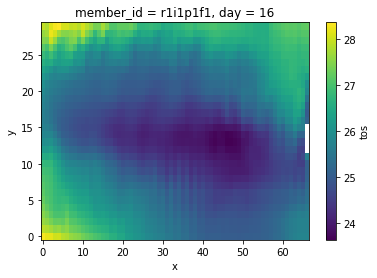

In [143]:
tos_nino3_climatology.isel(day=0).plot()

monthly anomaly of SST (or TOS here) over the Nino3 region

we subtract the monthly climatology values calculated above from the TOS value values and then do
a spatial average across the region of interest

In [145]:
tos_sel = tos_his.sel(time=slice('1980','2011'))
index_nino3 = (tos_sel.groupby('time.day')-tos_nino3_climatology).mean(dim=['x','y'])

In [146]:
index_nino3.compute()

/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'tos' (member_id: 1, time: 384)>
array([[-1.35181084e-01,  1.35181114e-01,  1.80445600e+00,
         2.56956124e+00,  3.28258705e+00,  2.68435025e+00,
         1.57839370e+00,  7.90716231e-01,  2.51117229e-01,
         1.52186841e-01,  1.00132120e+00,  1.49123335e+00,
         1.78132772e+00,  1.83214188e+00,  1.56761658e+00,
         2.45996237e+00,  2.72879148e+00,  1.47600508e+00,
         7.90786564e-01,  6.42222837e-02, -7.46752143e-01,
        -6.29533172e-01, -3.48024309e-01, -7.87495792e-01,
        -1.40119243e+00, -1.10336947e+00, -9.45914805e-01,
        -2.46467382e-01, -1.83425248e-01, -1.15887296e+00,
        -2.05342674e+00, -2.73854327e+00, -3.11170006e+00,
        -2.96968246e+00, -2.53736496e+00, -2.43563652e+00,
        -2.32261968e+00, -1.64966643e+00, -4.49074686e-01,
         1.09321475e+00,  1.64579844e+00,  1.45242107e+00,
         6.82906568e-01,  2.98154294e-01,  9.69066694e-02,
        -8.95437002e-02, -1.00933298e-01, -1.98621690e-01,
        -1.83804601e-01, -2.02112228e-01, -1.04314290e-01,
         6.97762012e-01,  6.01688564e-01,  2.34245807e-01,
        -1.19569588e+00, -1.43575382e+00, -2.02291393e+00,
        -2.58074498e+00, -2.07230067e+00, -2.80682421e+00,
...
        -1.77963614e+00, -1.58075476e+00, -1.21353126e+00,
        -4.74525750e-01,  4.58609551e-01, -1.11626655e-01,
        -1.75712645e+00, -2.23527265e+00, -2.66932535e+00,
        -2.90933108e+00, -2.45444298e+00, -2.74750853e+00,
        -2.29106832e+00, -1.56137776e+00, -1.23277867e+00,
         1.86421990e-01,  1.46902776e+00,  1.05770314e+00,
         5.81351779e-02, -5.40212154e-01, -9.87446487e-01,
        -1.34370172e+00, -7.46981561e-01, -8.37521613e-01,
        -1.60599545e-01,  6.88125372e-01,  4.91532236e-01,
         2.44245791e+00,  3.27768183e+00,  3.28544545e+00,
         2.00774050e+00,  1.47500467e+00,  1.04315889e+00,
         1.05747402e+00,  2.00144172e+00,  2.14376545e+00,
         2.89784646e+00,  3.27175856e+00,  2.33833385e+00,
         3.74721813e+00,  3.37716985e+00,  1.03177142e+00,
        -1.54601109e+00, -1.93237305e+00, -2.18420291e+00,
        -2.78120613e+00, -2.14098001e+00, -2.74293470e+00,
        -2.27963805e+00, -2.65568566e+00, -2.82986617e+00,
        -6.86338067e-01, -3.38239893e-02, -7.14770854e-01,
        -1.51463437e+00, -1.36182821e+00, -1.72834551e+00,
        -2.00829434e+00, -1.13800395e+00, -1.14820933e+00]], dtype=float32)
Coordinates:
  * time       (time) object 1980-01-16 12:00:00 ... 2011-12-25 00:00:00
  * member_id  (member_id) <U8 'r1i1p1f1'
    day        (time) int64 16 16 18 17 18 17 18 17 ... 25 24 25 24 24 25 24 25

<ipython-input-147-90fd70a17ab6>:1: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = index_nino3.indexes['time'].to_datetimeindex()


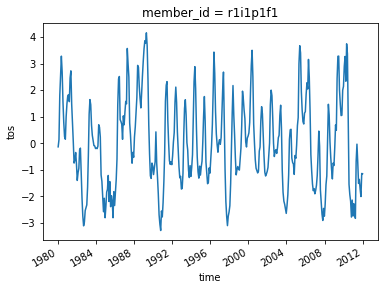

In [147]:
datetimeindex = index_nino3.indexes['time'].to_datetimeindex()
index_nino3['time'] = datetimeindex
index_nino3.plot()

## 1%CO2

In [32]:
ds_1pct = dict_Omon_tos["CMIP6.NOAA-GFDL.GFDL-ESM4.1pctCO2.Omon"]

In [33]:
ds_1pct.time.to_dataframe()

,time
time,
0001-01-16 12:00:00,0001-01-16 12:00:00
0001-02-15 00:00:00,0001-02-15 00:00:00
0001-03-16 12:00:00,0001-03-16 12:00:00
0001-04-16 00:00:00,0001-04-16 00:00:00
0001-05-16 12:00:00,0001-05-16 12:00:00
...,...
0150-08-16 12:00:00,0150-08-16 12:00:00
0150-09-16 00:00:00,0150-09-16 00:00:00
0150-10-16 12:00:00,0150-10-16 12:00:00


In [ ]:
#ds_1pct.info


In [20]:
#tos_1pct = ds_1pct.tos#.sel(time = slice("1980", "2011"))

In [34]:
#TODO INSERT CORRECT CODE TO SELECT SPECIFIED REGION (lat range and lon range) in TOS 

tos_1pct = ds_1pct.tos.sel(y = slice(-5,5), x = slice(-150,-90))
#tos

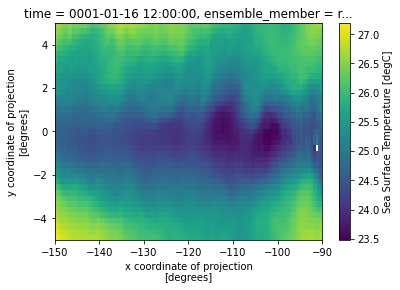

In [35]:
tos_1pct.isel(time=0).plot()

CALCULATE SEA SURFACE TEMPERATURE WEIGHTED AVERAGE

In [36]:
tos_mean_nino3_1pct = (tos_1pct * areacello_nino3).sum(dim=('x', 'y')) / total_areacello
#nino3_index.plot()

In [37]:
tos_mean_nino3_1pct.compute()

<xarray.DataArray (ensemble_member: 1, time: 1800)>
array([[25.240553, 25.748297, 26.135637, ..., 27.92831 , 28.12126 ,
        28.985657]], dtype=float32)
Coordinates:
  * time             (time) object 0001-01-16 12:00:00 ... 0150-12-16 12:00:00
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'

In [38]:
tos_mean_nino3_1pct.size

1800

In [39]:
tos_mean_nino3_1pct.isel(time=0).compute()

<xarray.DataArray (ensemble_member: 1)>
array([25.240553], dtype=float32)
Coordinates:
    time             object 0001-01-16 12:00:00
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'

In [40]:
#datetimeindex_1pct = tos_mean_nino3_1pct.indexes['time'].to_datetimeindex()

In [41]:
#tos_mean_nino3_1pct['time'] = datetimeindex_1pct

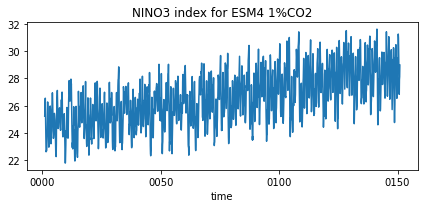

In [42]:
tos_mean_nino3_1pct.plot(aspect=2, size=3)
plt.title("NINO3 index for ESM4 1%CO2")
plt.tight_layout()
plt.draw()

In [43]:
tos_nino3_climatology_1pct = tos_1pct.sel(time=slice('0119','0150')).groupby('time.month').mean(dim='time')


In [44]:
tos_nino3_climatology_1pct.compute()

/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'tos' (ensemble_member: 1, month: 12, y: 39, x: 120)>
array([[[[30.213112, 30.188995, 30.1706  , ..., 29.830112, 29.852398,
          29.880331],
         [30.17844 , 30.152851, 30.136745, ..., 29.842587, 29.863445,
          29.887173],
         [30.136904, 30.104893, 30.091488, ..., 29.851913, 29.86638 ,
          29.886084],
         ...,
         [29.589394, 29.584965, 29.576187, ..., 29.719463, 29.811716,
          29.888096],
         [29.638636, 29.631884, 29.618332, ..., 29.712002, 29.81858 ,
          29.911   ],
         [29.680494, 29.672598, 29.662003, ..., 29.687664, 29.81202 ,
          29.919664]],

        [[30.676498, 30.66817 , 30.655128, ..., 30.525711, 30.507595,
          30.491983],
         [30.614304, 30.60513 , 30.58675 , ..., 30.50057 , 30.467339,
          30.447266],
         [30.538797, 30.530914, 30.518574, ..., 30.438341, 30.40107 ,
          30.376741],
...
         [29.544744, 29.53453 , 29.50552 , ..., 30.165003, 30.139393,
          30.10944 ],
         [29.634571, 29.615286, 29.59287 , ..., 30.202045, 30.17641 ,
          30.1494  ],
         [29.734144, 29.716854, 29.695312, ..., 30.223364, 30.201542,
          30.186283]],

        [[29.6629  , 29.649364, 29.6409  , ..., 27.941244, 27.945028,
          27.946358],
         [29.628082, 29.61208 , 29.59947 , ..., 27.912395, 27.917028,
          27.923817],
         [29.5962  , 29.581236, 29.560741, ..., 27.876083, 27.887657,
          27.897982],
         ...,
         [29.644798, 29.61794 , 29.590204, ..., 29.97118 , 30.009048,
          30.051731],
         [29.711823, 29.680387, 29.655628, ..., 29.95771 , 30.007977,
          30.058826],
         [29.765667, 29.735834, 29.713638, ..., 29.922577, 29.986296,
          30.047022]]]], dtype=float32)
Coordinates:
    lat              (y, x) float32 -4.872 -4.872 -4.872 ... 4.872 4.872 4.872
    lon              (y, x) float32 -149.8 -149.2 -148.8 ... -90.75 -90.25
  * x                (x) float64 -149.8 -149.2 -148.8 ... -91.25 -90.75 -90.25
  * y                (y) float64 -4.872 -4.615 -4.359 ... 4.359 4.615 4.872
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'
  * month            (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

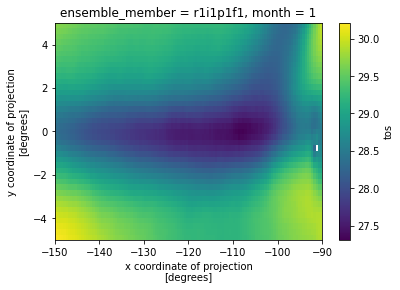

In [45]:
tos_nino3_climatology_1pct.isel(month=0).plot()

monthly anomaly of SST (or TOS here) over the Nino3 region

we subtract the monthly climatology values calculated above from the TOS value values and then do
a spatial average across the region of interest

In [46]:
tos_sel = tos_1pct.sel(time=slice('0119','0150'))
index_nino3 = (tos_sel.groupby('time.month')-tos_nino3_climatology_1pct).mean(dim=['x','y'])

In [47]:
index_nino3.compute()

/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'tos' (ensemble_member: 1, time: 384)>
array([[-2.4369519 , -2.2268212 , -1.0887513 , -1.6543334 , -1.5035197 ,
        -1.2875879 , -1.0684881 , -1.4005944 , -1.2731    , -1.3996809 ,
        -1.58933   , -1.5726931 , -1.2612725 , -0.6119959 , -0.51061875,
        -0.13067307, -0.29454368, -0.04160992, -0.17284419, -0.26489195,
         0.02869011,  0.4207879 ,  0.02471487, -0.04387553, -0.07532196,
        -0.19544934, -0.26992562, -0.8190028 , -0.30284485, -0.6764676 ,
        -0.6333329 , -0.01547616,  0.16490395, -0.28924665, -0.644857  ,
        -0.14059876, -0.39786774, -0.26563781, -0.53002644, -0.5272849 ,
         0.02802673,  0.98940456,  1.3593884 ,  0.9912849 ,  0.66672784,
         0.670518  ,  0.30287465, -0.25085023, -0.26936194, -0.45564312,
        -0.80144507, -0.38800552, -0.9126912 , -1.1749899 , -1.3568214 ,
        -1.1087555 , -1.4447093 , -0.64234054, -0.5694114 , -0.77251536,
        -0.32780448, -0.8955987 , -0.01791439,  0.02088269, -0.28242624,
        -0.93562704, -1.3307865 , -1.9477749 , -1.9943852 , -1.7336345 ,
        -2.2079718 , -1.6415415 , -0.68658674, -0.3762771 ,  0.16121095,
         0.091989  ,  0.7316947 ,  1.1050764 ,  0.9559299 ,  0.6947481 ,
         0.6008345 ,  0.18342237, -0.06635599, -0.5096147 , -0.6080536 ,
        -1.1362656 , -1.2539004 , -0.6717468 , -1.4990873 , -1.2803187 ,
        -0.61892086, -0.31274074, -0.18638737, -0.02652749,  0.4875758 ,
         0.6004967 ,  0.2831006 ,  0.27150095,  0.58753574,  0.36027732,
...
        -0.5345194 , -0.53313386, -0.11180329,  0.26588023,  0.3369079 ,
         0.82470024,  1.2793261 ,  1.2823577 ,  0.91595846,  0.5875596 ,
         0.38317513,  0.21429671, -0.31416753, -0.35331574, -0.46565187,
        -0.8663356 , -0.64976525, -0.03015177,  0.24542378,  0.1765754 ,
         0.32983452,  0.50830954,  0.43352586,  0.35982594,  0.9267963 ,
         1.157785  ,  0.6227679 ,  0.6827985 ,  0.75364524,  0.62893903,
         0.38742086,  0.3754449 ,  0.32459682,  0.33483157,  0.20203443,
         0.9881769 ,  0.9853196 ,  0.7987803 ,  0.51569223,  0.95085263,
         0.9769161 ,  0.82514256,  0.1648155 , -0.13554479,  0.08262371,
        -0.27564645,  0.07859372,  0.19080994, -0.4583548 , -0.316397  ,
         0.06270322, -0.03229918, -0.11438977, -0.47512197, -0.5908516 ,
        -0.17773159, -0.04202524,  0.08589452,  0.09709202,  0.50927603,
        -0.35982484, -0.00820339,  0.06509932, -0.5364282 , -0.7249427 ,
        -1.2470423 , -1.5404854 , -1.21077   , -1.1435374 , -0.4587622 ,
         0.7545023 ,  0.3829307 ,  0.41256016,  0.2119426 ,  0.28851348,
        -0.11456998, -0.08851116,  0.24047692,  0.23467404,  0.10117027,
         0.38907775,  0.3508126 ,  0.75314975,  0.10327009,  0.20809744,
         0.99135965,  0.91818434,  1.1799519 ,  1.1277878 ,  0.99605316,
         0.5242531 ,  1.2069478 ,  0.84775275,  0.85939485]],
      dtype=float32)
Coordinates:
  * time             (time) object 0119-01-16 12:00:00 ... 0150-12-16 12:00:00
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'
    month            (time) int64 1 2 3 4 5 6 7 8 9 10 ... 4 5 6 7 8 9 10 11 12

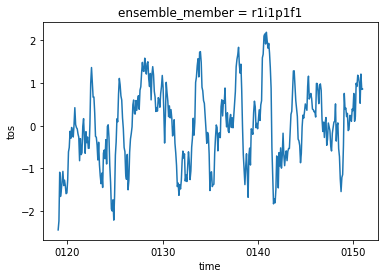

In [48]:
#datetimeindex = index_nino3.indexes['time'].to_datetimeindex()
#index_nino3['time'] = datetimeindex
index_nino3.plot()

## Abrupt-4xCO2

In [49]:
ds_4x = dict_Omon_tos["CMIP6.NOAA-GFDL.GFDL-ESM4.abrupt-4xCO2.Omon"]

In [50]:
ds_4x.time.to_dataframe()

,time
time,
0001-01-16 12:00:00,0001-01-16 12:00:00
0001-02-15 00:00:00,0001-02-15 00:00:00
0001-03-16 12:00:00,0001-03-16 12:00:00
0001-04-16 00:00:00,0001-04-16 00:00:00
0001-05-16 12:00:00,0001-05-16 12:00:00
...,...
0150-08-16 12:00:00,0150-08-16 12:00:00
0150-09-16 00:00:00,0150-09-16 00:00:00
0150-10-16 12:00:00,0150-10-16 12:00:00


In [51]:
tos_4x = ds_4x.tos.sel(time = slice("0119", "0150"))

In [52]:
#TODO INSERT CORRECT CODE TO SELECT SPECIFIED REGION (lat range and lon range) in TOS 
#tos = ds.tos......
tos_4x = ds_4x.tos.sel(y = slice(-5,5), x = slice(-150,-90))
#tos

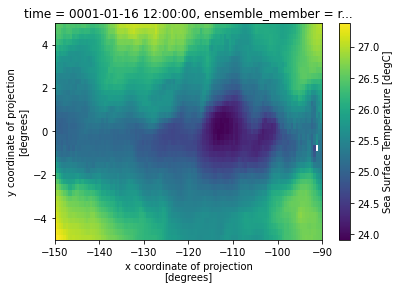

In [53]:
tos_4x.isel(time=0).plot()

CALCULATE SEA SURFACE TEMPERATURE WEIGHTED AVERAGE

In [54]:
tos_mean_nino3_4x = (tos_4x * areacello_nino3).sum(dim=('x', 'y')) / total_areacello
#nino3_index.plot()

In [55]:
tos_mean_nino3_4x.compute()

<xarray.DataArray (ensemble_member: 1, time: 1800)>
array([[25.639414, 26.249512, 26.237864, ..., 26.837673, 27.146858,
        28.272776]], dtype=float32)
Coordinates:
  * time             (time) object 0001-01-16 12:00:00 ... 0150-12-16 12:00:00
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'

In [56]:
tos_mean_nino3_4x.size #1980 values, 1 value per month , 12 per year for 165 years

1800

In [57]:
tos_mean_nino3_4x.isel(time=0).compute()

<xarray.DataArray (ensemble_member: 1)>
array([25.639414], dtype=float32)
Coordinates:
    time             object 0001-01-16 12:00:00
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'

In [ ]:
#datetimeindex_4x = tos_mean_nino3_4x.indexes['time'].to_datetimeindex()
#tos_mean_nino3_4x['time'] = datetimeindex_4x


In [ ]:
tos_mean_nino3_4x.sel(time=slice('0119','0150')).plot(aspect=2, size=3)
plt.title("NINO3 index for ESM4 abrupt-4xCO2")
plt.tight_layout()
plt.draw()

In [ ]:
tos_nino3_climatology_4x = tos_4x.sel(time=slice('0119','0150')).groupby('time.month').mean(dim='time')


In [ ]:
tos_nino3_climatology_4x.compute()

In [ ]:
tos_nino3_climatology_4x.isel(month=0).plot()

monthly anomaly of SST (or TOS here) over the Nino3 region

we subtract the monthly climatology values calculated above from the TOS value values and then do
a spatial average across the region of interest

In [46]:
tos_sel_4x = tos_4x.sel(time=slice('0119','0150'))
index_nino3_4x = (tos_sel_4x.groupby('time.month')-tos_nino3_climatology_4x).mean(dim=['x','y'])

In [ ]:
index_nino3_4x.compute()

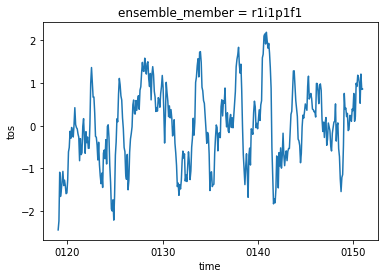

In [48]:
#datetimeindex = index_nino3.indexes['time'].to_datetimeindex()
#index_nino3['time'] = datetimeindex
index_nino3_4x.plot()